## Telco Churning Project using Machine Learning

This project will utilize the CRISP-DM framework for its analysis

## Business Understanding



Using the provided dataset, a business could gain insights into the factors that influence customer churn. For example, analyzing customer demographics (e.g., gender, SeniorCitizen status) could reveal if certain groups are more likely to churn, allowing the company to tailor retention efforts to those groups. Understanding the impact of services (e.g., PhoneService, InternetService) on churn could help in improving service quality or offering promotions to retain customers.

Furthermore, analyzing contract terms (e.g., Contract length, PaperlessBilling) and payment methods could provide insights into the effectiveness of different billing strategies in retaining customers. By identifying these factors and their impact on churn, businesses can develop targeted retention strategies, such as personalized offers, loyalty programs, or improved customer service, to reduce churn and increase customer loyalty.

Null Hypothesis 
- There is no significant relationship between the contract terms and customer churn.

Alternate Hypothesis
- There is a significant relationship between the contract terms and customer churn.

Analytical Questions
1. What is the total churn rate

2. What is the churn rate by gender?

3. How does the citizen level affect their likelihood to churn?

4. Are customers with PhoneService more likely to churn?

5. How do contract terms (e.g., Contract length, PaperlessBilling) influence churn?

6. What role do payment methods play in customer churn?

Data Extraction

In [1]:
## importing the necessary libraries
#%pip install pyodbc python-dotenv 

import pyodbc    
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import seaborn as sns
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

In [2]:

# Create a connection string to extract first 3000 rows from SQL server
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'
driver= '{ODBC Driver 17 for SQL Server}'
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
try:
    conn = pyodbc.connect(connection_string)
    cursor = conn.cursor()
    print('Connection established successfully.')
except Exception as e:
    print(f'Error connecting to the database: {e}')


Connection established successfully.


In [3]:
## loading of the first 3000 rows of dataset
query = "Select * from dbo.LP2_Telco_churn_first_3000"

data3000 = pd.read_sql(query, conn)
data3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
## saving the first 3000 as csv
data3000.to_csv("churnfirst3000.csv", index=False)

In [5]:
## checking the second 2000rows of the dataset
data2000 = pd.read_csv('../Dataset/LP2_Telco-churn-second-2000.csv')
data2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


Data Understanding

In [6]:
## Merging both datasets before analyzing
df = pd.concat([data3000, data2000], axis=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
##check the tail
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
## checking the number of entries in the entire dataset and the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [9]:
##checking for null valuess
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [10]:
## checking for duplicates
df.duplicated().value_counts()

False    5043
Name: count, dtype: int64

In [11]:
## checking uniques 
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [12]:
## decriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


Observations
- We can see from the mean and medians that our data is not normally distributed since the mean and median arent really close
- On the average, Total Charges is around 2,302
- On the average, Monthly charges is around 65

In [13]:
## clean data
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [14]:
# Checking unique entries in each column
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Column '{column}' has {len(unique_entries)} unique entries:")
    print(unique_entries[:])
    print()

Column 'customerID' has 5043 unique entries:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column 'gender' has 2 unique entries:
['Female' 'Male']

Column 'SeniorCitizen' has 2 unique entries:
[0 1]

Column 'Partner' has 4 unique entries:
[True False 'No' 'Yes']

Column 'Dependents' has 4 unique entries:
[False True 'No' 'Yes']

Column 'tenure' has 73 unique entries:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column 'PhoneService' has 4 unique entries:
[False True 'Yes' 'No']

Column 'MultipleLines' has 6 unique entries:
[None False True 'No' 'No phone service' 'Yes']

Column 'InternetService' has 3 unique entries:
['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity' has 6 unique entries:
[False True None 'No' 'Yes' 'No internet service']

Column 'OnlineBackup' has 6 u

In [15]:
def map_to_boolean(df):
    df["Partner"] = df["Partner"].map({True: "Yes", False: "No"})
    df["PhoneService"] = df["PhoneService"].map({True: "Yes", False: "No"})
    df["Dependents"] = df["Dependents"].map({True: "Yes", False: "No"})
    df["MultipleLines"] = df["MultipleLines"].map({True: "Yes", False: "No"})
    df["InternetService"] = df["InternetService"].map({"No": "No"})
    df["OnlineSecurity"] = df["OnlineSecurity"].map({True: "Yes", False: "No"})
    df["OnlineBackup"] = df["OnlineBackup"].map({True: "Yes", False: "No"})
    df["DeviceProtection"] = df["DeviceProtection"].map({True: "Yes", False: "No"})
    df["TechSupport"] = df["TechSupport"].map({True: "Yes", False: "No"})
    df["StreamingTV"] = df["StreamingTV"].map({True: "Yes", False: "No"})
    df["StreamingMovies"] = df["StreamingMovies"].map({True: "Yes", False: "No"})
    df["PaperlessBilling"] = df["PaperlessBilling"].map({True: "Yes", False: "No"})
    df["Churn"] = df["Churn"].map({True: "Yes", False: "No"})

    return df

# Example usage
df = map_to_boolean(df)

In [16]:
## checking unique entries in each column
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Column '{column}' has {len(unique_entries)} unique entries:")
    print(unique_entries[:])
    print()

Column 'customerID' has 5043 unique entries:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column 'gender' has 2 unique entries:
['Female' 'Male']

Column 'SeniorCitizen' has 2 unique entries:
[0 1]

Column 'Partner' has 3 unique entries:
['Yes' 'No' nan]

Column 'Dependents' has 3 unique entries:
['No' 'Yes' nan]

Column 'tenure' has 73 unique entries:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column 'PhoneService' has 3 unique entries:
['No' 'Yes' nan]

Column 'MultipleLines' has 3 unique entries:
[nan 'No' 'Yes']

Column 'InternetService' has 2 unique entries:
[nan 'No']

Column 'OnlineSecurity' has 3 unique entries:
['No' 'Yes' nan]

Column 'OnlineBackup' has 3 unique entries:
['Yes' 'No' nan]

Column 'DeviceProtection' has 3 unique entries:
['No' 'Yes' nan]

Col

In [17]:
for col in df.columns:
    df_ = df[col].value_counts()
    print(f"Value counts for column '{col}':\n{df_}\n")


Value counts for column 'customerID':
customerID
7590-VHVEG    1
5143-EGQFK    1
8232-CTLKO    1
0847-HGRML    1
9050-QLROH    1
             ..
5451-MHQOF    1
0999-QXNSA    1
1060-ENTOF    1
3283-WCWXT    1
3186-AJIEK    1
Name: count, Length: 5043, dtype: int64

Value counts for column 'gender':
gender
Male      2559
Female    2484
Name: count, dtype: int64

Value counts for column 'SeniorCitizen':
SeniorCitizen
0    4224
1     819
Name: count, dtype: int64

Value counts for column 'Partner':
Partner
No     1538
Yes    1462
Name: count, dtype: int64

Value counts for column 'Dependents':
Dependents
No     2070
Yes     930
Name: count, dtype: int64

Value counts for column 'tenure':
tenure
1     434
72    257
2     167
3     144
71    124
     ... 
39     40
28     39
44     36
36     34
0       8
Name: count, Length: 73, dtype: int64

Value counts for column 'PhoneService':
PhoneService
Yes    2731
No      269
Name: count, dtype: int64

Value counts for column 'MultipleLines':
Multi

Exploratory Data Analysis on numeric columns


In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric with errors set to 'coerce'


In [19]:
df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

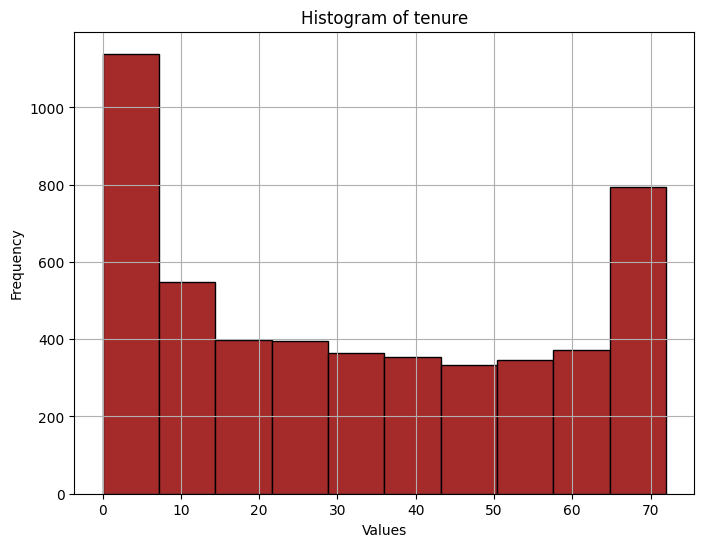

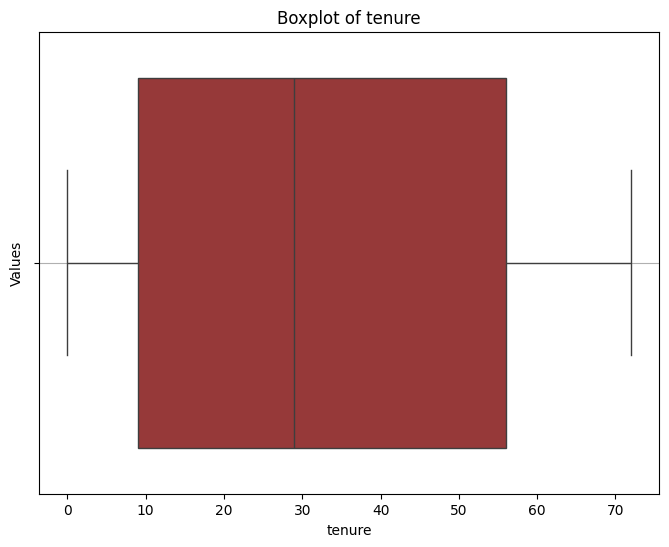

In [20]:
# Create a histogram for tenure
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=10, color='brown', edgecolor='black')
plt.title('Histogram of tenure')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'], color='brown', orient='v')
plt.title('Boxplot of tenure')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()


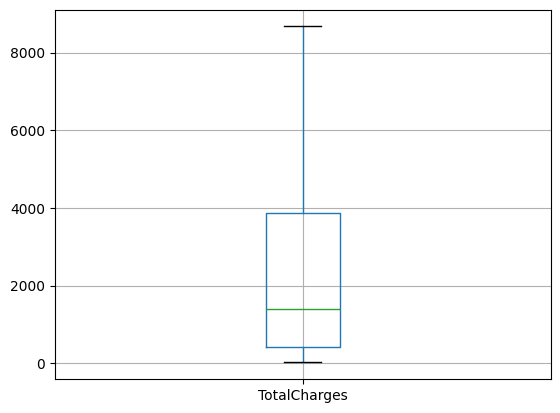

In [21]:
## checking the distribution in the Total charges
df.boxplot(column='TotalCharges')
plt.show()

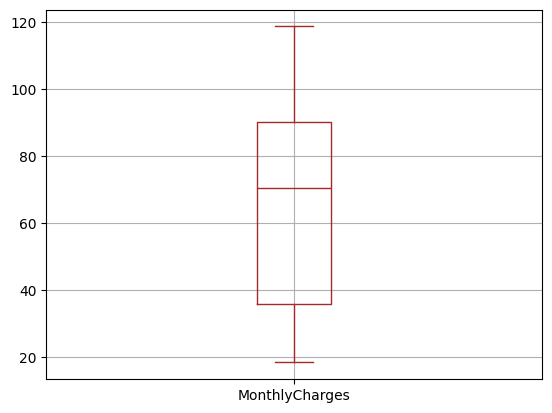

In [22]:
## visualizing the distribution of monthly charges
df.boxplot(column='MonthlyCharges', color='brown')
plt.show()

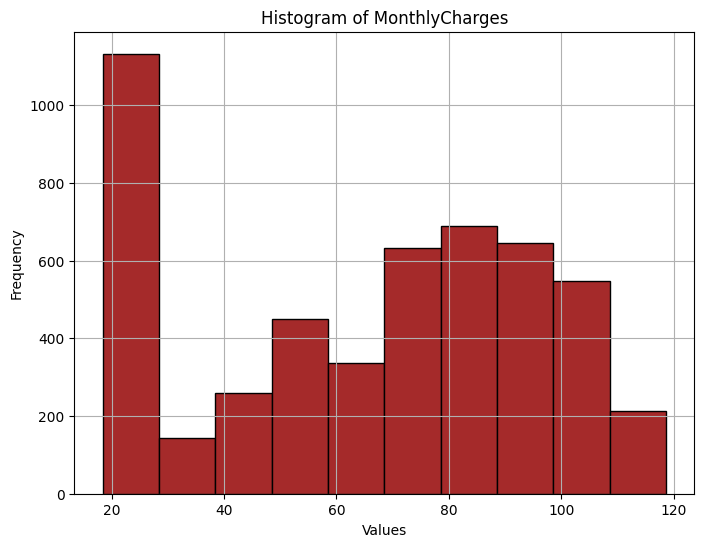

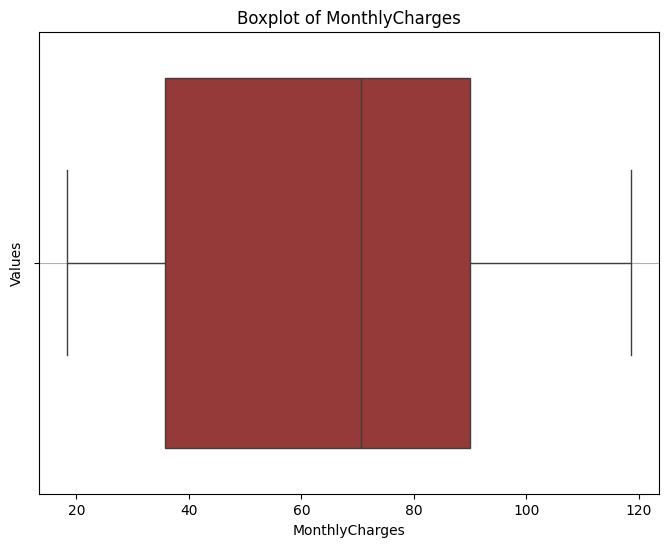

In [23]:
# Create a histogram for MonthlyCharges
plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyCharges'], bins=10, color='brown', edgecolor='black')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'], color='brown', orient='v')
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

##### Exploratory Data Analysis On Some Categorical features

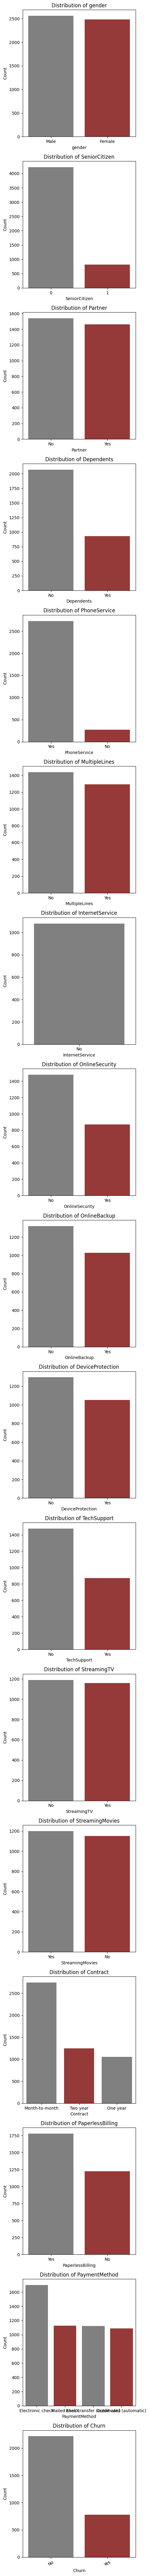

In [24]:
def plot_subplots(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(5, 5*num_cols))
    
    for i, col in enumerate(columns):
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=axes[i],palette={"grey","Brown"})
        plt.xticks(rotation=30)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines" , "InternetService", "OnlineSecurity", "OnlineBackup", 
                   "DeviceProtection", "TechSupport", "StreamingTV", 
                   "StreamingMovies", "Contract", "PaperlessBilling", 
                   "PaymentMethod", "Churn"]
plot_subplots(df, columns_to_plot)



1. What is the total churn rate?

<Axes: ylabel='count'>

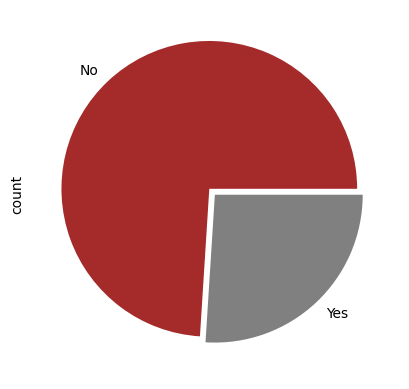

In [25]:
df["Churn"].value_counts().plot.pie(explode=(0.05,0.005), colors=['brown', "grey"])

2. What is the churn rate among different demographic groups (e.g., gender, SeniorCitizen status)?

In [26]:
df.groupby("gender")["Churn"].value_counts()

gender  Churn
Female  No       1079
        Yes       384
Male    No       1140
        Yes       396
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

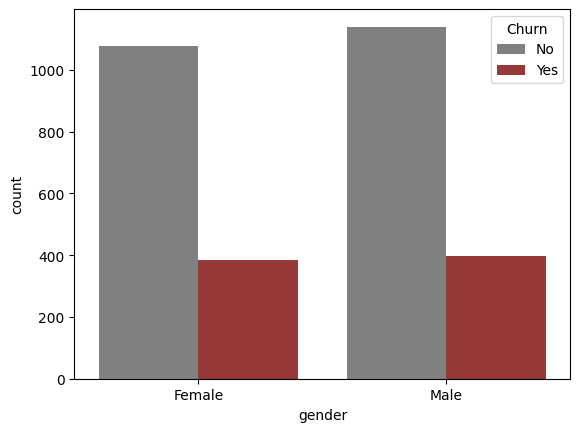

In [27]:
sns.countplot(data=df, x="gender", hue="Churn", palette={"No":"grey", "Yes":"Brown"})

3. How does the citizen level affect their likelihood to churn?

<Axes: xlabel='SeniorCitizen', ylabel='count'>

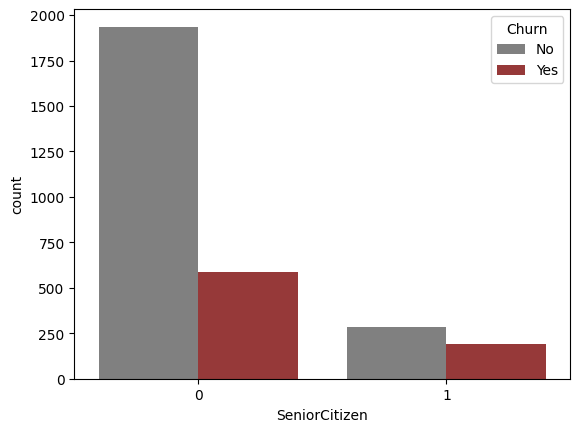

In [28]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

4. Are customers with Phone Services more likely to churn?

<Axes: xlabel='PhoneService', ylabel='count'>

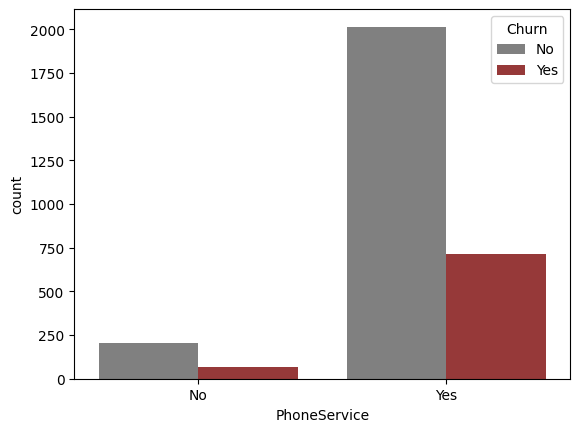

In [29]:
sns.countplot(data=df, x="PhoneService", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

5. How do contract terms (e.g., Contract length, PaperlessBilling) influence churn?

<Axes: xlabel='Contract', ylabel='count'>

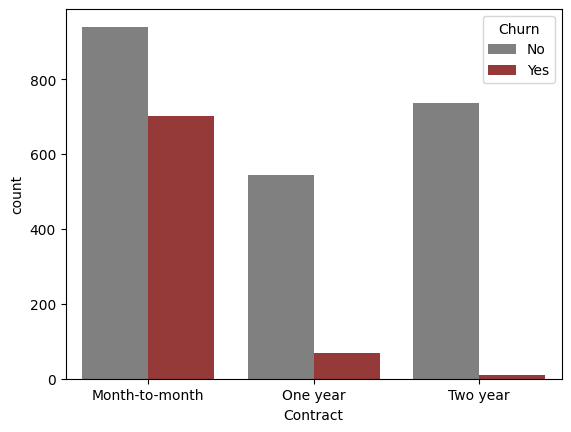

In [30]:
sns.countplot(data=df, x="Contract", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

<Axes: xlabel='PaperlessBilling', ylabel='count'>

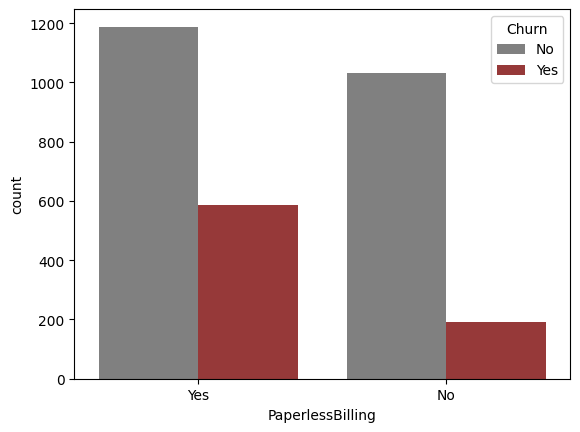

In [31]:
sns.countplot(data=df, x="PaperlessBilling", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

6. What role do payment methods play in customer churn?

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

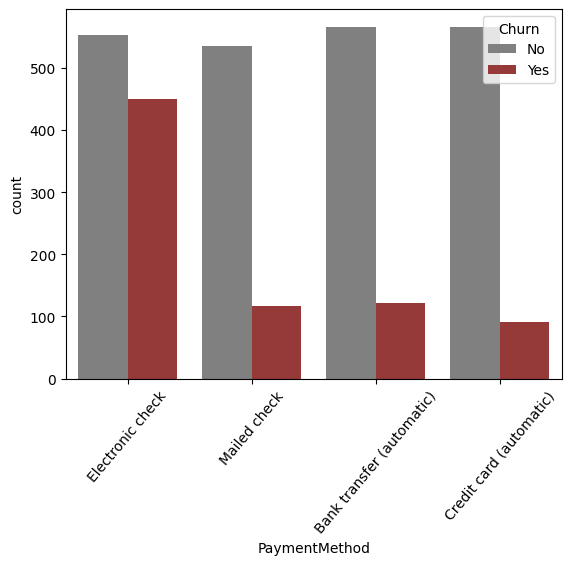

In [32]:
sns.countplot(data=df, x="PaymentMethod", hue="Churn",palette={"No":"grey", "Yes":"Brown"})
plt.xticks(rotation=50)


Insights from analytical questions
1.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     2731 non-null   object 
 8   InternetService   1080 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  3000 non-null   object 
 17  

In [34]:
df["TechSupport"].value_counts()

TechSupport
No     1476
Yes     873
Name: count, dtype: int64

## Hypothesis Testing

Chi square test will be used for hypothesis testing. The chi-square test helps you assess whether there is evidence to reject the null hypothesis that the two categorical variables are independent. If the p-value is low, you can conclude that there is a significant association between the variables. If the p-value is high, you fail to reject the null hypothesis, suggesting that there is no significant association.

In [58]:


# Creating a contigency table
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# printing results of the p-value
print("P-value:", p)

# printing Results of the t-test
# having alpha to be 0.05(level of significance)
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis - There is a significant relationship between Contract terms and Churn.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between Contract terms and Churn.")



P-value: 1.2608778315145474e-118
Reject the null hypothesis - There is a significant relationship between Contract terms and Churn.


Observation
- We can see from the results that our p-value is wayy lesser than the significance level. Hence we can conclude that the null     hypothesis we have is less significant and hence we have enough confidence to reject the null hypothesis.
- This means our alternative hypothesis is actually true (There is a relationship between Contracts and Churn)

## Data Preperation

#### Checking if the dataset is balanced

In [56]:
# checking distribution of the Churn column
df["Churn"].value_counts()

Churn
No     2219
Yes     780
Name: count, dtype: int64

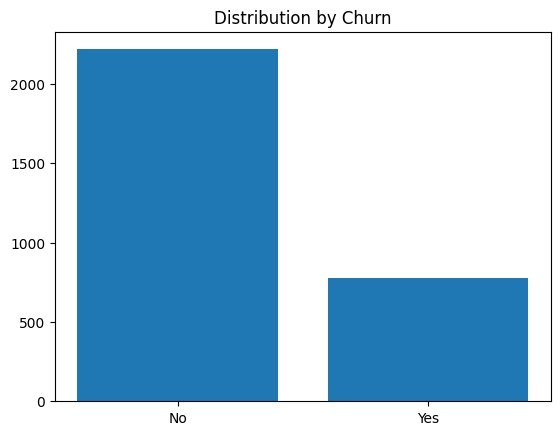

In [57]:
## checking if data is balanced
plt.bar(df["Churn"].value_counts().index, df["Churn"].value_counts())
plt.title("Distribution by Churn")
plt.show()

Observation
- From the visualization above, we can see that the target is not balanced. 

Solutions
- Using models that can handle imbalanced datasets eg: RandomForests, XGBoost, Catboost, Adaboost, LogisticRegressor
- Instead of using accuracy, which can be misleading for imbalanced datasets, we will consider using metrics like precision, recall, F1-score
- Collecting more data for the minority class which is Churned customers("yes") 